In [1]:
from keras.applications import VGG16

conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
)

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [3]:
import os

base_dir = '/home/alex/下载/学习/data/dogs-vs-cats-small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc']
)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 819s 8s/step - loss: 0.5563 - acc: 0.7215 - val_loss: 0.3794 - val_acc: 0.8420
Epoch 2/100
100/100 [==============================] - 798s 8s/step - loss: 0.3903 - acc: 0.8305 - val_loss: 0.2901 - val_acc: 0.8760
Epoch 3/100
100/100 [==============================] - 843s 8s/step - loss: 0.3183 - acc: 0.8660 - val_loss: 0.2275 - val_acc: 0.9030
Epoch 4/100
100/100 [==============================] - 903s 9s/step - loss: 0.2910 - acc: 0.8795 - val_loss: 0.2150 - val_acc: 0.9050
Epoch 5/100
100/100 [==============================] - 921s 9s/step - loss: 0.2805 - acc: 0.8815 - val_loss: 0.1977 - val_acc: 0.9120
Epoch 6/100
100/100 [==============================] - 943s 9s/step - loss: 0.2611 - acc: 0.8885 - val_loss: 0.2055 - val_acc: 0.9180
Epoch 7/100
100/100 [==============================] - 861s 9s/step - loss: 0.2494 - acc: 0.8955 - val_loss: 0.1974 - val_acc: 0.9240
Epoch 8/100
100/100 [==============================] - 786s 8s

Epoch 62/100
100/100 [==============================] - 774s 8s/step - loss: 0.0559 - acc: 0.9810 - val_loss: 0.2818 - val_acc: 0.9220
Epoch 63/100
100/100 [==============================] - 776s 8s/step - loss: 0.0474 - acc: 0.9815 - val_loss: 0.1765 - val_acc: 0.9450
Epoch 64/100
100/100 [==============================] - 774s 8s/step - loss: 0.0407 - acc: 0.9855 - val_loss: 0.2614 - val_acc: 0.9300
Epoch 65/100
100/100 [==============================] - 774s 8s/step - loss: 0.0493 - acc: 0.9840 - val_loss: 0.2436 - val_acc: 0.9330
Epoch 66/100
100/100 [==============================] - 774s 8s/step - loss: 0.0489 - acc: 0.9815 - val_loss: 0.2323 - val_acc: 0.9400
Epoch 67/100
100/100 [==============================] - 775s 8s/step - loss: 0.0445 - acc: 0.9850 - val_loss: 0.1797 - val_acc: 0.9420
Epoch 68/100
100/100 [==============================] - 776s 8s/step - loss: 0.0438 - acc: 0.9810 - val_loss: 0.2139 - val_acc: 0.9440
Epoch 69/100
100/100 [==============================] -

In [7]:
model.save('cats_and_dogs_small_VGG16_B.h5')

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Train & Validation accuracy')
plt.legend()

plt.savefig("dog_vs_cat_acc_VGG16_B.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train & Validation loss')
plt.legend()

plt.savefig("dog_vs_cat_loss_VGG16_B.png")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

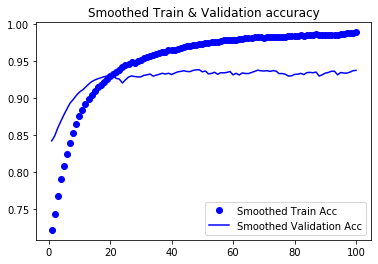

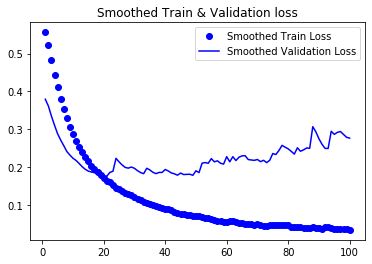

In [9]:
# 曲线平滑

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            pre = smoothed_points[-1]
            smoothed_points.append(pre * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed Train Acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed Validation Acc')
plt.title('Smoothed Train & Validation accuracy')
plt.legend()

plt.savefig("dog_vs_cat_acc_VGG16_B_smooth.png")

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed Train Loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed Validation Loss')
plt.title('Smoothed Train & Validation loss')
plt.legend()

plt.savefig("dog_vs_cat_loss_VGG16_B_smooth.png")
plt.show()